결정트리
==
데이터
--
- 붓꽃(iris) 분류 데이터


In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, :2] 
y = iris.target

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

결정 트리 그리기 (옵션)
--

Graphbiz 설치
--

- graphviz.org 사이트에서 다운로드 후 설치
- 윈도우 버전:
- https://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [14]:
# !pip install graphviz

In [15]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    clf,
    out_file = "./data/iris.dot",
    feature_names = iris.feature_names[:2],
    class_names = iris.target_names,
    filled = True
    )

## 윈도우에서
 dot_graph = f.read()  부분은 아래로 변경  
 dot_graph = str(open(＂./data/iris.dot＂, ＂rb＂).read(), ＂utf8＂)

In [16]:
with open("./data/iris.dot") as f:
    dot_graph = str(open("./data/iris.dot", "rb").read(), "utf8")
    
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

결정 경계선 그리기
--

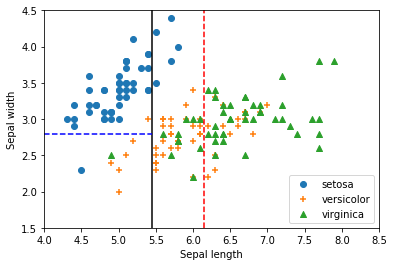

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o', '+', '^']
for i in range(3):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


# 결정 트리 경계선: 실선은 루트 노드 점선은 자식 노드
xx = np.linspace(5.45, 5.45, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '-k') # 검정색 실선

xx = np.linspace(4, 5.45, 3)
yy = np.linspace(2.8, 2.8, 3)
plt.plot(xx, yy, '--b') # 파란색 점선

xx = np.linspace(6.15, 6.15, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '--r') # 붉은색 점선


In [12]:
print(clf.predict([[5.5, 4]]))

[1]


In [13]:
print(clf.predict_proba([[5.5, 4]]))

[[0.11627907 0.65116279 0.23255814]]


## 트리 내부 변수
### 유방암 분류

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
cancer = load_breast_cancer() 

In [14]:
cancer.target

array(['malignant', 'benign'], dtype='<U9')

In [3]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target) 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.916083916083916


In [18]:
list(zip(cancer.feature_names, clf.feature_importances_.round(4)))

[('mean radius', 0.0),
 ('mean texture', 0.0417),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0426),
 ('mean symmetry', 0.0114),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.0172),
 ('smoothness error', 0.0024),
 ('compactness error', 0.012),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.0172),
 ('worst texture', 0.0396),
 ('worst perimeter', 0.6947),
 ('worst area', 0.0),
 ('worst smoothness', 0.0),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0),
 ('worst concave points', 0.1211),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

In [19]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })

In [20]:
df

,feature,importance
0,mean radius,0.000000
1,mean texture,0.041720
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.000000
6,mean concavity,0.000000
7,mean concave points,0.042647
8,mean symmetry,0.011405
9,mean fractal dimension,0.000000


In [22]:
df=df.sort_values('importance', ascending=False) 
print(df.head(20))

                   feature  importance
22         worst perimeter    0.694689
27    worst concave points    0.121068
7      mean concave points    0.042647
1             mean texture    0.041720
21           worst texture    0.039639
13              area error    0.017216
20            worst radius    0.017188
15       compactness error    0.012042
8            mean symmetry    0.011405
14        smoothness error    0.002385
2           mean perimeter    0.000000
3                mean area    0.000000
4          mean smoothness    0.000000
5         mean compactness    0.000000
6           mean concavity    0.000000
12         perimeter error    0.000000
9   mean fractal dimension    0.000000
10            radius error    0.000000
11           texture error    0.000000
28          worst symmetry    0.000000


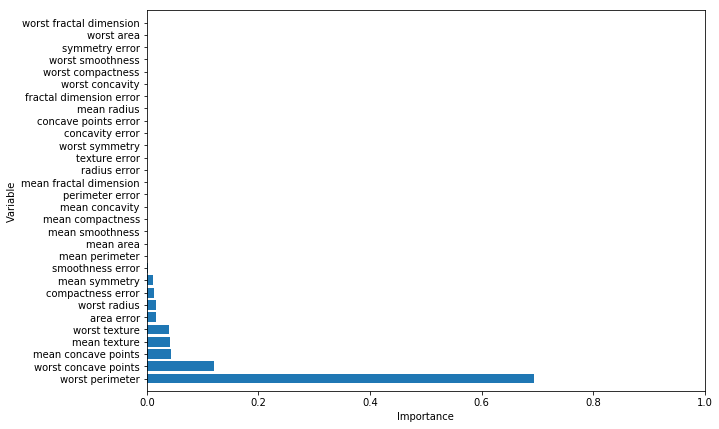

In [25]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,7)) 
plt.barh(x, y) 
plt.yticks(ypos, x) 
plt.xlabel('Importance') 
plt.ylabel('Variable') 
plt.xlim(0, 1) 
plt.ylim(-1, len(x)) 
plt.show()

# ----------------연습장----------------

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, :2]# X값을 2개만 가져오다 꽃받침 길이와 폭
y = iris.target

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth= 2) #2번만 트리를 구동시키다,많이 하면 정확도가 더 높아지지만, 2번만 했을때 어떨지 보기 위해
clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [7]:
!pip install graphviz

In [11]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    clf,   #위에서 학습시킨 모델을 인자로 주다
    out_file = "./data/iris.dot",  #출력파일에다 저장시키다,  "./data/iris.dot: 임의로 준 파일이다
    feature_names = iris.feature_names[:2],  #feature_names : 꽃의 종류를 가져오다
    class_names = iris.target_names,  #
    filled = True
)

In [19]:
with open("./data/iris.dot") as f:
    dot_graph = str(open("./data/iris.dot", "rb").read(), "utf8")
    
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

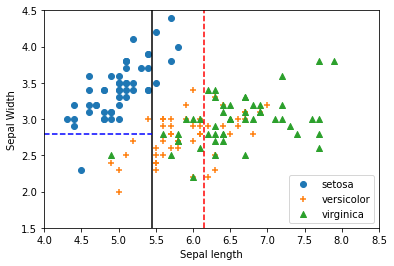

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o', '+', '^']
for i in range(3):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
    
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")

# 결정 트리 경계선: 실선은 루트 노드 점선은 자식 노드
xx = np.linspace(5.45, 5.45, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '-k')  #검정색 실선
# 맨처음에 Sepal length 5.45 기준으로 검정색 선으로 기준 나누다
#이렇게 나누면 이 직선의 왼쪽에 파란색 점(Setosa)이 상당부분 들어간다, 오른쪽에는 파란색 점이 거의 안들어간다
xx = np.linspace(4, 5.45, 3)
yy = np.linspace(2.8, 2.8, 3)
plt.plot(xx, yy, '--b')  #파란색 점선
#파란색 점선을 잘라야, setosa와 아닌 것을 가장 잘 구분할 수 있다

xx = np.linspace(6.15, 6.15, 3)
yy = np.linspace(1.5, 4.5, 3)
plt.plot(xx, yy, '--r') #붉은색 점선

In [23]:
print(clf.predict([[5.5,4 ]]))
#꽃받침 길이 5.5, 꽃받침 너비: 4 일때는 어디에 속하냐? -> 1 (versicolor)

[1]


In [24]:
print(clf.predict_proba([[5.5, 4]]))  #[[0.11627907 0.65116279 0.23255814]] <- 0번, 1번, 2번 이 되는 확률 결과값이다

[[0.11627907 0.65116279 0.23255814]]


In [1]:
from sklearn.datasets import load_breast_cancer  #바로 데이터를 불러오다
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
cancer = load_breast_cancer()

In [9]:
cancer.data[:3].T

array([[1.799e+01, 2.057e+01, 1.969e+01],
       [1.038e+01, 1.777e+01, 2.125e+01],
       [1.228e+02, 1.329e+02, 1.300e+02],
       [1.001e+03, 1.326e+03, 1.203e+03],
       [1.184e-01, 8.474e-02, 1.096e-01],
       [2.776e-01, 7.864e-02, 1.599e-01],
       [3.001e-01, 8.690e-02, 1.974e-01],
       [1.471e-01, 7.017e-02, 1.279e-01],
       [2.419e-01, 1.812e-01, 2.069e-01],
       [7.871e-02, 5.667e-02, 5.999e-02],
       [1.095e+00, 5.435e-01, 7.456e-01],
       [9.053e-01, 7.339e-01, 7.869e-01],
       [8.589e+00, 3.398e+00, 4.585e+00],
       [1.534e+02, 7.408e+01, 9.403e+01],
       [6.399e-03, 5.225e-03, 6.150e-03],
       [4.904e-02, 1.308e-02, 4.006e-02],
       [5.373e-02, 1.860e-02, 3.832e-02],
       [1.587e-02, 1.340e-02, 2.058e-02],
       [3.003e-02, 1.389e-02, 2.250e-02],
       [6.193e-03, 3.532e-03, 4.571e-03],
       [2.538e+01, 2.499e+01, 2.357e+01],
       [1.733e+01, 2.341e+01, 2.553e+01],
       [1.846e+02, 1.588e+02, 1.525e+02],
       [2.019e+03, 1.956e+03, 1.70

In [13]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
cancer.target_names  #'malignant': 악성, 'benign': 양성

array(['malignant', 'benign'], dtype='<U9')

In [2]:
cancer = load_breast_cancer()
np.random.seed(9)  #랜덤 넘버로 9개를 주다
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target)  #여기서 cancer.data는 x데이터, input 데이터가 되다
#cancer.target는 암이냐, 아니냐 0과 1로 이루어진 데이터  #stratify: 훈련데이터와 시험 데이터를 나눌때 한쪽으로 치우치지 않게 암의 악성과 양성을 동 수로 나누다 
clf = DecisionTreeClassifier()  #모델 생성자를 만들다
clf.fit(X_train, y_train)   #훈련시키다
print(clf.score(X_test, y_test))  #점수를 출력시키다

0.916083916083916


In [14]:
clf.feature_importances_ 
#[0.        , 0.04171972, 0.          
#: 첫번째 인자는 거의 기여를 하지 못했고
#: 두번째 인자는 0.04 기여했다

array([0.        , 0.04171972, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04264716, 0.01140527, 0.        ,
       0.        , 0.        , 0.        , 0.01721595, 0.00238546,
       0.01204155, 0.        , 0.        , 0.        , 0.        ,
       0.01718842, 0.03963949, 0.69468863, 0.        , 0.        ,
       0.        , 0.        , 0.12106833, 0.        , 0.        ])

In [15]:
cancer.feature_names  #어떤 변수가 중요한지 maping을 하고 싶다

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
list(zip(cancer.feature_names, clf.feature_importances_.round(4)))[:10]
#cancer의 feature name하고 결정트리의 중요도를 zip(1대1로 서로 묶다)하다
#.round(4): 소수점 4째 자리에서 끊어서 [:10]10개만 보여줘라

[('mean radius', 0.0),
 ('mean texture', 0.0417),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0426),
 ('mean symmetry', 0.0114),
 ('mean fractal dimension', 0.0)]

In [19]:
#기여도를 높은 순으로 바꾸어 보다
df=pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_})
#pandas에  dataframe만들고  key값과 value가 있는 dictionary 형태로 만들다


In [21]:
df  #feature 라는 컬럼과  importance라는 컬럼이 있으면서  밑으로 쭉 나가다
#여기서 0인 데이터는 영양가가 없는 데이터이다.
#worst perimeter 는 69%나 기여했다. 결정적인 인자

,feature,importance
0,mean radius,0.000000
1,mean texture,0.041720
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.000000
6,mean concavity,0.000000
7,mean concave points,0.042647
8,mean symmetry,0.011405
9,mean fractal dimension,0.000000


In [22]:
#위의 dataframe을 정렬하고 싶다
df=df.sort_values('importance',ascending=False)# ascending=False  : 내림차순
print(df.head(10))  #상위 10개만 출력하다

                 feature  importance
22       worst perimeter    0.694689
27  worst concave points    0.121068
7    mean concave points    0.042647
1           mean texture    0.041720
21         worst texture    0.039639
13            area error    0.017216
20          worst radius    0.017188
15     compactness error    0.012042
8          mean symmetry    0.011405
14      smoothness error    0.002385


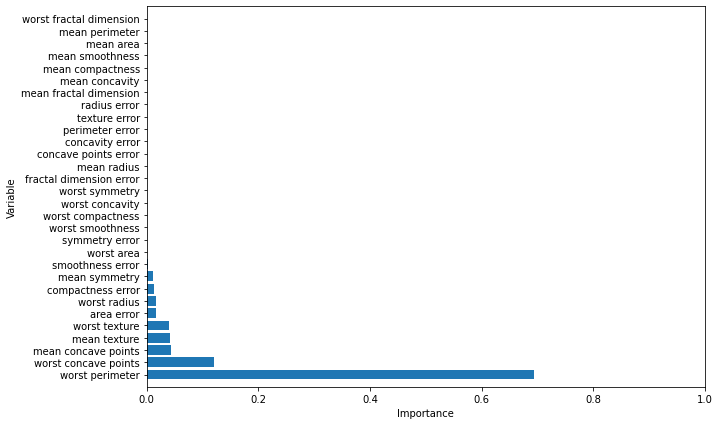

In [23]:
x= df.feature   #속성값
y= df.importance #중요도
ypos = np.arange(len(x))
plt.figure(figsize=(10,7))
plt.barh(x, y)  #barh로 막대그래프 그리다 h는 수평
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0,1)
plt.ylim(-1, len(x))
plt.show()